# **Dynamic Systems – Summary**

Dynamic systems are systems whose variables change over time and are often described by **differential equations**.

---

## **1. Forms of Differential Equations**

* **Semi-explicit form:**

  ```math
  \frac{dx}{dt} = f(x, p)
  ```

  Derivatives are isolated on one side.

* **Open equation form:**

  ```math
  f\left(\frac{dx}{dt}, x, p\right) = 0
  ```

  All terms are combined on one side.

**Where:**

* (x): variables determined by solving the equations
* (p): parameters specified by a user or optimizer

---

## **2. Example – Motion of an Object**

For an object in one dimension:

```math
F = ma, \quad \frac{dy}{dt} = v, \quad \frac{dv}{dt} = a
```

* If algebraic equations (like (F = ma)) appear with differential ones → **Differential Algebraic Equations (DAEs)**
* Without algebraic terms → **Ordinary Differential Equations (ODEs)**
* With both time and spatial derivatives → **Partial Differential Equations (PDEs)**

  * PDEs can be **discretized** in space to return to ODE or DAE form.

---

## **3. Dynamic vs. Steady-State Systems**

| Type             | Description                             | Condition                    |
| ---------------- | --------------------------------------- | ---------------------------- |
| **Dynamic**      | At least one variable changes with time | $ \frac{dx}{dt} \neq 0 $    |
| **Steady State** | All variables remain constant over time | $ \frac{dx}{dt} = 0 $       |

---

## **4. Solution Methods**

### **a. Analytic Solution**

* Found by **integrating** the differential equations exactly.
* Requires **initial conditions** for each differential variable (e.g., initial position (y_0), velocity (v_0)).
* Example for constant force (F):

  ```math
  a = \frac{F}{m}, \quad v = at + v_0, \quad y = \frac{1}{2}at^2 + v_0t + y_0
  ```
* If the force changes, divide the time horizon into **segments** where (F) is constant.

---

### **b. Numerical Solution**

* Approximates (x(t)) at **discrete time steps**.
* Used for large or complex systems without exact analytic solutions.
* Accuracy depends on:

  * Discretization method
  * Solver error tolerance
  * Step size and convergence criteria

---

## **In Short**

Dynamic systems evolve over time and can be modeled using **differential or algebraic equations**.
Solutions may be:

* **Analytic (exact)** – derived from integration, or
* **Numerical (approximate)** – computed step-by-step using numerical solvers.

---


In [1]:
from apm import *  # load APMonitor.com toolkit
import matplotlib.pyplot as plt

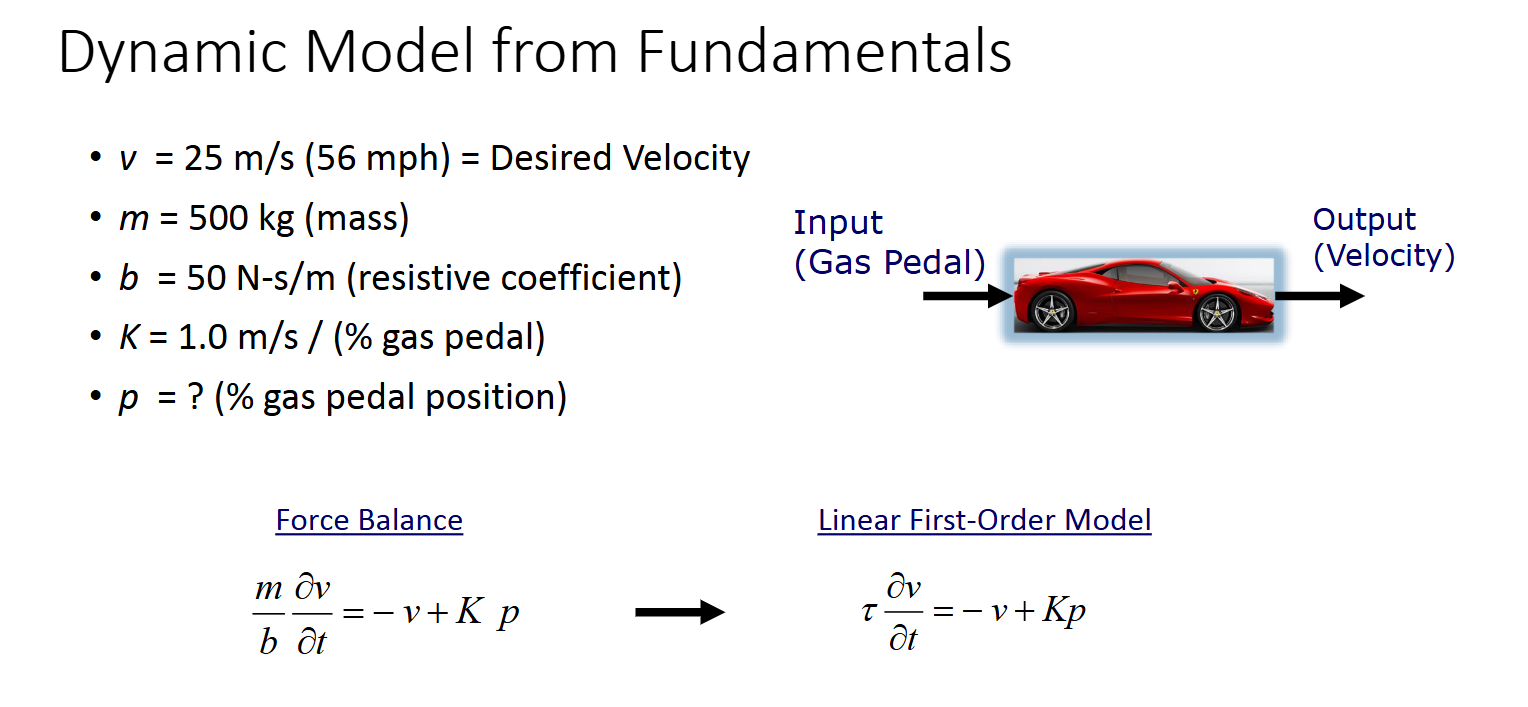

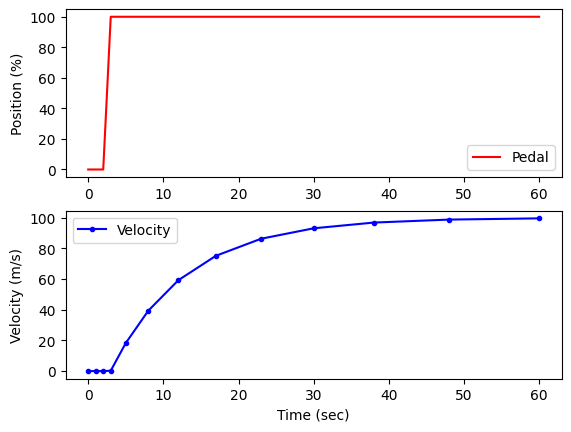

In [2]:
z = apm_solve('ferrari',7) # solve
# plot results
plt.figure()

plt.subplot(211)
plt.plot(z['time'],z['p'],'r-')
plt.legend(['Pedal'])
plt.ylabel('Position (%)')

plt.subplot(212)
plt.plot(z['time'],z['v'],'b.-')
plt.legend(['Velocity'])
plt.ylabel('Velocity (m/s)')
plt.xlabel('Time (sec)')
plt.show()

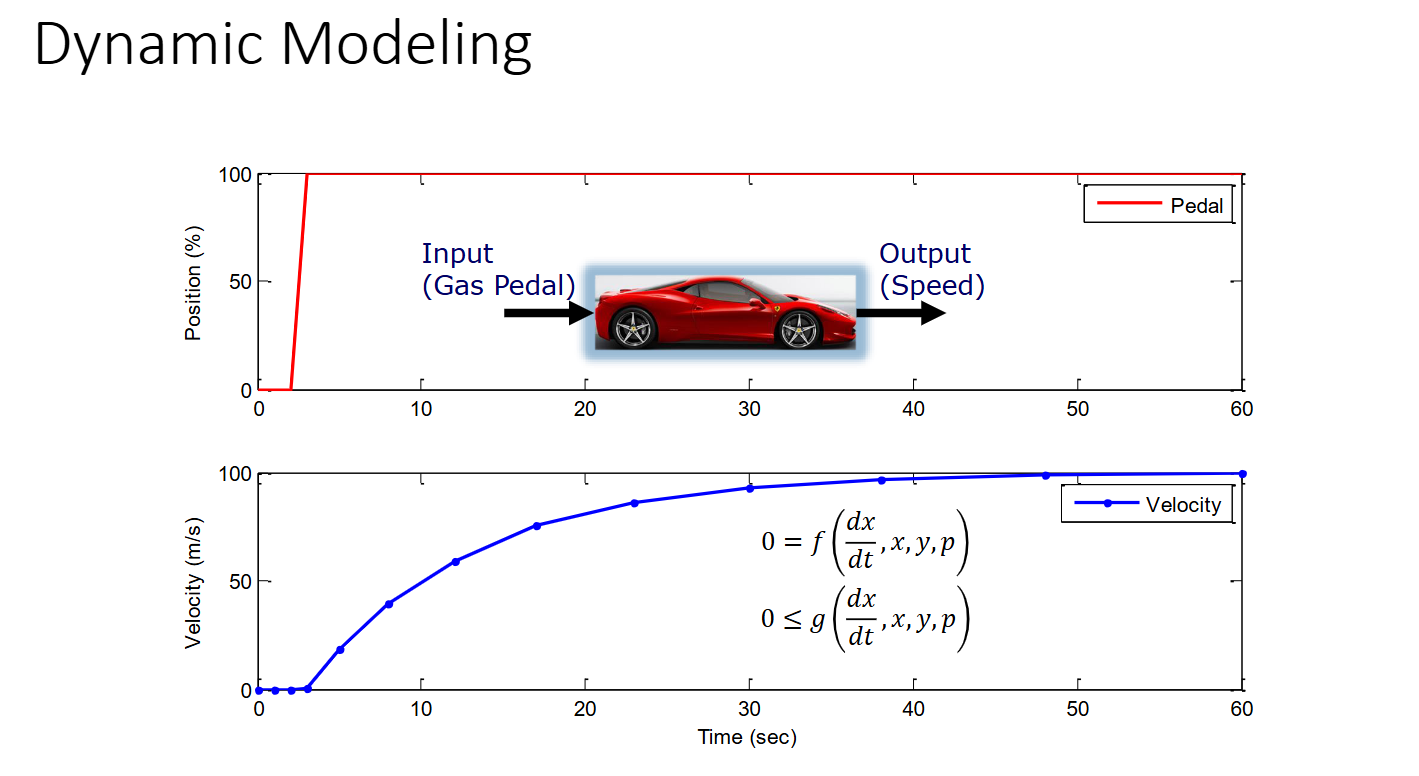

# **Mathematical Description of Dynamic Systems**

Models are not just equations but collections of **assumptions**, **mathematical expressions**, **boundary conditions**, **initial conditions**, and **constraints**.

These mathematical expressions can range from:

* A simple equation of motion for an object in a frictionless environment
* To complex systems that describe **multi-body physics and interactions**

A standard model form is shown below:

```math
0 = f\left(\frac{dx}{dt}, x, p\right)
```

```math
0 < g\left(\frac{dx}{dt}, x, p\right)
```

In this case:

* The **differential** and **algebraic equations** are condensed into ( f(\frac{dx}{dt}, x, p) ).
* Any purely algebraic expressions simply omit the derivative terms.
* Expressions can represent:

  * **Equality constraints** → ( f(\cdot) = 0 )
  * **Inequality constraints** → ( g(\cdot) > 0 )

---

## **Exercise**

**Objective:**
Provide a basic introduction to **dynamic system modeling and simulation** using the **equations of motion**.

**Tasks:**

1. Create a **MATLAB** (`ode23`, `ode15s`, etc.) or **Python** (`ODEINT`) script to simulate and display results.
2. Simulate using **APM MATLAB** or **Python GEKKO**.
3. Compare:

   * **Sequential methods:** ODE integrators in MATLAB / Python
   * **Simultaneous method:** APMonitor / GEKKO
4. Observe how the **number of time points** in APMonitor affects **solution accuracy**.

**Estimated Time:** ~1 hour

---

## **Problem Statement**

Predict the **position** and **velocity** of a **skydiver** in **two dimensions** (horizontal and vertical) from the initial jump through the first **90 seconds**.

### **Scenario:**

* At **t = 60 seconds**, the skydiver **deploys the parachute**, increasing drag and slowing descent.
* The airplane flies at a **constant altitude of 5000 meters** and **horizontal velocity of 50 m/s** when the skydiver jumps.

### **Given Parameters:**

| Parameter                     | Symbol  | Value | Unit    | Description                |
| ----------------------------- | ------- | ----- | ------- | -------------------------- |
| Drag coefficient (free-fall)  | ( C_d ) | 0.2   | N·s²/m² | Low drag (chute closed)    |
| Drag coefficient (chute open) | ( C_d ) | 10    | N·s²/m² | High drag (chute deployed) |
| Gravitational constant        | ( g )   | 9.8   | m/s²    | Gravity                    |
| Mass (skydiver + chute)       | ( m )   | 80    | kg      | Constant mass              |

---

## **Expected Outcome**

* Simulated **position** and **velocity** profiles over 90 seconds
* Comparison of **solver behavior** between:

  * MATLAB/Python ODE integrators (sequential)
  * APMonitor/GEKKO (simultaneous)
* Discussion of how **time discretization** impacts **solution accuracy**